In [2]:
from layerwise_activations import store_layerwise_activations
from utils import set_up_dir, ReportInterface
import matplotlib.pyplot as plt
import h5py
import caffe
import numpy as np
import lmdb
%matplotlib inline

In [46]:
# ACTIVITY
phase = caffe.TRAIN
net_prototxt ='/mnt/antares_raid/home/oliver/Experiments/MLP/AER/MLP_net.prototxt'
keys=['encode1neuron', 'encode2neuron', 'encode3neuron', 'encode4neuron'] 
model = '/mnt/antares_raid/home/oliver/Experiments/R/snapshots/_iter_780000.caffemodel'

lmdb_path = '/mnt/raid/dnn/data_oliver/lmdb/MNIST_TRAIN_60000_rot_lmdb/shuffled/'
keys = ['encode1neuron', 'encode2neuron', 'encode3neuron', 'encode4neuron']
n = 13
dst_fpath='/mnt/antares_raid/home/oliver/Experiments/R/activations/activity_n_13.hdf5'
store_layerwise_activations(net_prototxt, model, phase, keys, n, dst_fpath)

path created: /mnt/antares_raid/home/oliver/Experiments/R/activations/
Destination: /mnt/antares_raid/home/oliver/Experiments/R/activations/activity_n_13.hdf5
('/mnt/antares_raid/home/oliver/Experiments/MLP/AER/MLP_net.prototxt', '/mnt/antares_raid/home/oliver/Experiments/R/snapshots/_iter_780000.caffemodel', 0)
0
1
2
3
4
5
6
7
8
9
10
11
12
SAVING
Done creating /mnt/antares_raid/home/oliver/Experiments/R/activations/activity_n_13.hdf5


In [3]:
#ROTATION ANGLES
rot_lmdb_path =  '/mnt/raid/dnn/data_oliver/lmdb/MNIST_TEST_10000_rot_ang_lmdb/shuffled/'

lmdb_env = lmdb.open(rot_lmdb_path)
lmdb_txn = lmdb_env.begin()
lmdb_cursor = lmdb_txn.cursor()
R = []
im_count = 0
for key, value in lmdb_cursor:
        R.append(value)
Rot = np.asarray([float(r) for r in R])
Rot = Rot - np.min(Rot)
Rot = Rot/np.max(Rot)
Rot = Rot
    

In [39]:
dst_fpath='/mnt/antares_raid/home/oliver/Experiments/R/activations/activity.hdf5'
keys = ['encode1neuron', 'encode2neuron', 'encode3neuron', 'encode4neuron']

import scipy 
C = {k:{} for k in keys}
with h5py.File(dst_fpath, "r") as f: #f[k]: n*batchsize x 784
    for k in f:
        print(k)
        for nr, r in enumerate(list(set(Rot))):
            print(r)
            Rot_r = np.copy(Rot)
            Rot_r[Rot_r != r] = 0.
            C[k].update({str(r): np.array([scipy.stats.pearsonr(Rot_r,f[k][:,i] ) for i in range(f[k].shape[1] )] )})


encode1neuron
0.25
1.0
0.333333333333
0.5
0.416666666667
0.0
0.166666666667
0.0833333333333
0.916666666667
0.583333333333
0.75
0.833333333333
0.666666666667
encode2neuron
0.25
1.0
0.333333333333
0.5
0.416666666667
0.0
0.166666666667
0.0833333333333
0.916666666667
0.583333333333
0.75
0.833333333333
0.666666666667
encode3neuron
0.25
1.0
0.333333333333
0.5
0.416666666667
0.0
0.166666666667
0.0833333333333
0.916666666667
0.583333333333
0.75
0.833333333333
0.666666666667
encode4neuron
0.25
1.0
0.333333333333
0.5
0.416666666667
0.0
0.166666666667
0.0833333333333
0.916666666667
0.583333333333
0.75
0.833333333333
0.666666666667


In [37]:
dst_fpath='/mnt/antares_raid/home/oliver/Experiments/R/activations/correlations.hdf5'

S = ReportInterface()
S.__save_dict_to_hdf5__(C, dst_fpath)

#CL = S.__load_dict_from_hdf5__(dst_fpath)
#print([v.keys() for k,v in CL.iteritems()])

ValueError: The data representation in the HDF5 file does not match the original dict.

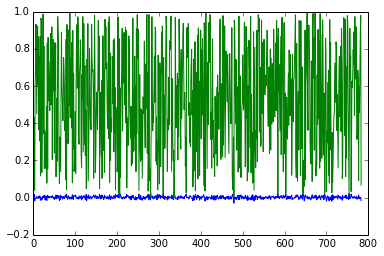

336


In [123]:
plt.plot(C['encode1neuron'][1.0])
plt.show()

a = np.argmin(zip(*C['encode1neuron'][1.0])[1])
print(a)

In [28]:
print(np.mean(zip(*C['encode1neuron'])[0]))
print(np.mean(zip(*C['encode2neuron'])[0]))
print(np.mean(zip(*C['encode3neuron'])[0]))
print(np.mean(zip(*C['encode4neuron'])[0]))

4.13297447959e-05
-6.14370111199e-05
0.000181842642755
-1.17949401954e-05


In [49]:
np.array(Rot).shape

(13000,)

In [17]:
print(C.keys())

['encode2neuron', 'encode3neuron', 'encode1neuron', 'encode4neuron']


In [63]:
print(C)

{'encode2neuron': {0.25: 1, 1.0: 1, 0.5: 1, 0.41666666666666669: 1, 0.75: 1, 0.16666666666666666: 1, 0.083333333333333329: 1, 0.91666666666666663: 1, 0.83333333333333337: 1, 0.0: 1, 0.58333333333333337: 1, 0.66666666666666663: 1, 0.33333333333333331: 1}, 'encode3neuron': {0.25: 1, 1.0: 1, 0.5: 1, 0.41666666666666669: 1, 0.75: 1, 0.16666666666666666: 1, 0.083333333333333329: 1, 0.91666666666666663: 1, 0.83333333333333337: 1, 0.0: 1, 0.58333333333333337: 1, 0.66666666666666663: 1, 0.33333333333333331: 1}, 'encode1neuron': {0.25: 1, 1.0: 1, 0.5: 1, 0.41666666666666669: 1, 0.75: 1, 0.16666666666666666: 1, 0.083333333333333329: 1, 0.91666666666666663: 1, 0.83333333333333337: 1, 0.0: 1, 0.58333333333333337: 1, 0.66666666666666663: 1, 0.33333333333333331: 1}, 'encode4neuron': {0.25: 1, 1.0: 1, 0.5: 1, 0.41666666666666669: 1, 0.75: 1, 0.16666666666666666: 1, 0.083333333333333329: 1, 0.91666666666666663: 1, 0.83333333333333337: 1, 0.0: 1, 0.58333333333333337: 1, 0.66666666666666663: 1, 0.333333

In [36]:
print(C.values())

[{'0.166666666667': array([[  4.03592830e-03,   1.45623152e-01],
       [ -2.66986844e-03,   3.35734634e-01],
       [  1.40920315e-04,   9.59477676e-01],
       ..., 
       [  4.44954964e-04,   8.72542943e-01],
       [  3.89778520e-04,   8.88237065e-01],
       [  7.38008569e-03,   7.79232152e-03]]), '0.583333333333': array([[ -8.38635823e-04,   7.62368808e-01],
       [  3.13173454e-03,   2.58832513e-01],
       [ -2.08551261e-03,   4.52089636e-01],
       ..., 
       [  2.54038339e-04,   9.27020661e-01],
       [  2.23658280e-03,   4.20009567e-01],
       [  1.13514119e-04,   9.67353531e-01]]), '1.0': array([[ -2.26143528e-03,   4.14863247e-01],
       [ -5.13431662e-04,   8.53135973e-01],
       [  3.79970143e-03,   1.70688897e-01],
       ..., 
       [  5.06212594e-03,   6.79754386e-02],
       [  1.10456633e-03,   6.90443447e-01],
       [ -3.99039185e-03,   1.50221896e-01]]), '0.833333333333': array([[ -4.05241455e-03,   1.43985039e-01],
       [  5.20170219e-04,   8.5123079